# Lab 4: Heaps
## Introduction:
In this lab we created our own implementation of a binary max heap and benchmarked the various functions for efficiency.

In [1]:
import heap

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy
import random
import time

### Evaluating Impact of List Order on Performance

In [4]:
featherList = random.sample(range(1, 101), 100)
lightList = random.sample(range(1, 1001), 1000)
middleList = random.sample(range(1, 10001), 10000)
heavyList = random.sample(range(1, 100001), 100000)
lists = [featherList, lightList, middleList, heavyList]
randomTimesBuild = {}
sortedTimesBuild = {}
reverseTimesBuild = {}

In [5]:
for l in lists:
    randomTimes = []
    for x in range(0, 10):
        startTime = time.perf_counter()
        maxHeap = heap.build_max_heap(l)
        endTime = time.perf_counter()
        randomTimes.append(endTime - startTime)
    randomTimesBuild[len(l)] = sum(randomTimes) / len(randomTimes)
    l.sort()
    sortedTimes = []
    for x in range(0, 10):
        startTime = time.perf_counter()
        maxHeap = heap.build_max_heap(l)
        endTime = time.perf_counter()
        sortedTimes.append(endTime - startTime)
    sortedTimesBuild[len(l)] = sum(sortedTimes) / len(sortedTimes)
    l.sort(reverse=True)
    reverseTimes = []
    for x in range(0, 10):
        startTime = time.perf_counter()
        maxHeap = heap.build_max_heap(l)
        endTime = time.perf_counter()
        reverseTimes.append(endTime - startTime)
    reverseTimesBuild[len(l)] = sum(reverseTimes) / len(reverseTimes) 

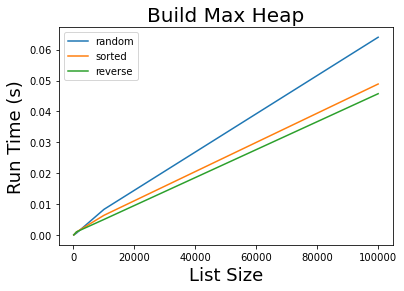

In [6]:
plt.plot(list(randomTimesBuild.keys()), list(randomTimesBuild.values()), label="random")
plt.plot(list(sortedTimesBuild.keys()), list(sortedTimesBuild.values()), label="sorted")
plt.plot(list(reverseTimesBuild.keys()), list(reverseTimesBuild.values()), label="reverse")
plt.xlabel("List Size", fontsize=18)
plt.ylabel("Run Time (s)", fontsize=18)
plt.title("Build Max Heap", fontsize=20)
# plt.xscale("log")
plt.legend()

### Evaluating  Impact  of  Building  Heap  in  One  Step  vs  Inserting  Each  Element

In [7]:
featherList = random.sample(range(1, 101), 100)
lightList = random.sample(range(1, 1001), 1000)
middleList = random.sample(range(1, 10001), 10000)
heavyList = random.sample(range(1, 100001), 100000)
lists = [featherList, lightList, middleList, heavyList]
randomTimesInsert = {}
sortedTimesInsert = {}
reverseTimesInsert = {}

In [8]:
for l in lists:
    randomTimes = []
    for x in range(0, 10):
        fakeHeap = []
        startTime = time.perf_counter()
        for i in l:
            heap.max_heap_insert(fakeHeap, i)
        endTime = time.perf_counter()
        randomTimes.append(endTime - startTime)
    randomTimesInsert[len(l)] = sum(randomTimes) / len(randomTimes)
    l.sort()
    sortedTimes = []
    for x in range(0, 10):
        fakeHeap = []
        startTime = time.perf_counter()
        for i in l:
            heap.max_heap_insert(fakeHeap, i)
        endTime = time.perf_counter()
        sortedTimes.append(endTime - startTime)
    sortedTimesInsert[len(l)] = sum(sortedTimes) / len(sortedTimes)
    l.sort(reverse=True)
    reverseTimes = []
    for x in range(0, 10):
        fakeHeap = []
        startTime = time.perf_counter()
        for i in l:
            heap.max_heap_insert(fakeHeap, i)
        endTime = time.perf_counter()
        reverseTimes.append(endTime - startTime)
    reverseTimesInsert[len(l)] = sum(reverseTimes) / len(reverseTimes) 

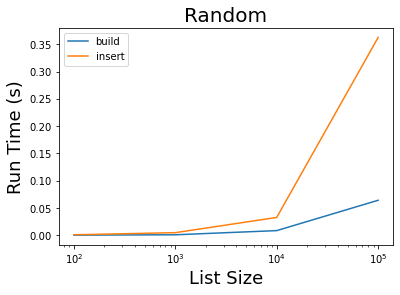

In [9]:
plt.plot(list(randomTimesBuild.keys()), list(randomTimesBuild.values()), label="build")
plt.plot(list(randomTimesInsert.keys()), list(randomTimesInsert.values()), label="insert")
plt.xlabel("List Size", fontsize=18)
plt.ylabel("Run Time (s)", fontsize=18)
plt.title("Random", fontsize=20)
plt.xscale("log")
plt.legend()

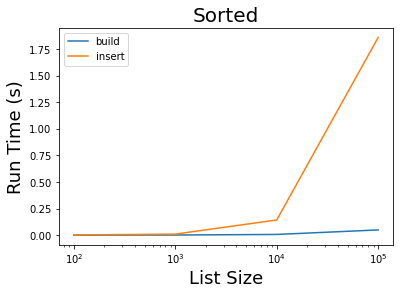

In [10]:
plt.plot(list(sortedTimesBuild.keys()), list(sortedTimesBuild.values()), label="build")
plt.plot(list(sortedTimesInsert.keys()), list(sortedTimesInsert.values()), label="insert")
plt.xlabel("List Size", fontsize=18)
plt.ylabel("Run Time (s)", fontsize=18)
plt.title("Sorted", fontsize=20)
plt.xscale("log")
plt.legend()

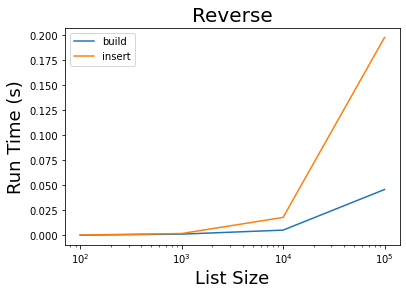

In [11]:
plt.plot(list(reverseTimesBuild.keys()), list(reverseTimesBuild.values()), label="build")
plt.plot(list(reverseTimesInsert.keys()), list(reverseTimesInsert.values()), label="insert")
plt.xlabel("List Size", fontsize=18)
plt.ylabel("Run Time (s)", fontsize=18)
plt.title("Reverse", fontsize=20)
plt.xscale("log")
plt.legend()

### Evaluating  Run-Time  of  Extraction  vs  Insert

In [12]:
import time
import heap
def benchmark_extract(input_list):
    lst_copy = input_list.copy()
    start_time = time.perf_counter()
    heap.build_max_heap(lst_copy)
    heap.heap_extract_max(lst_copy)
    end_time = time.perf_counter()
    return end_time - start_time

def benchmark_insert(input_list):
    em_heap = []
    start_time = time.perf_counter()
    for num in input_list:
        heap.max_heap_insert(em_heap, num)
    heap.heap_extract_max(em_heap)
    end_time = time.perf_counter()
    return end_time - start_time

In [15]:
import random
num_elements = [100, 1000, 10000, 100000]
ext_avg = []
ins_avg = []
extraction_times = []
insert_times = []

for num in num_elements:
    ext_temp = 0
    ins_temp = 0
    lst = [random.randint(0, 100) for i in range(0, num)]
    for i in range(0, 10):
        ext_avg.append(benchmark_extract(lst))
        ins_avg.append(benchmark_insert(lst))
    for x in ext_avg:
        ext_temp += x
    extraction_times.append(ext_temp/10)
    for x in ins_avg:
        ins_temp += x
    insert_times.append(ins_temp/10)
    

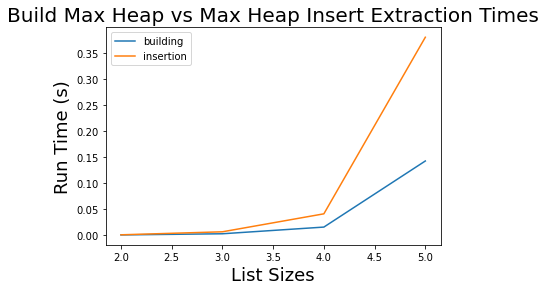

In [16]:
import math
for i in range(0, len(num_elements)):
    num_elements[i] = math.log10(num_elements[i])

plt.plot(num_elements, extraction_times, label="building")
plt.plot(num_elements, insert_times, label="insertion")
plt.xlabel("List Sizes", fontsize=18)
plt.ylabel("Run Time (s)", fontsize=18)
plt.title("Build Max Heap vs Max Heap Insert Extraction Times", fontsize=20)
plt.legend()
plt.show()

#### Question 1: Does the heap creation run time vary between the three scenarios? Which cases are the best-, average-, and worst cases
Yes, the best case is when the array is given as a max heap and the worst case is when the array is given as a min heao.

#### Question 2: Why do you think the best case is faster than the worst case?
The heap creation will vary between the scenarios. During the construction of a heap, every element, from the bottom up, is heapified. The amount of work the heapify method does will vary based on how heap-like the node is. In the best case, the array would already be in the form of a max heap so we would just need to over every node and verify this. In the worst case, the given

#### Question 3: Which is faster: building the entire heap at once or inserting one element at a time? Why?
Building the entire heap at once is faster as it is an O(n) operation. Inserting an element into the heap is log(n). If this operation id done n time, the operation is O(n * log(n))

#### Question 4: Is extracting an element from or inserting an element into the heap faster? Why?
Inserting and extracting an element from the heap have identical runtimes. When an element is removed or inserted, the heap must be restructured so it still satisfies the max heap property. This operation is O(log(n)) for both extracting and inserting elements into a heap.